# NKX6-2
[autosomal recessive spastic ataxia-8 with hypomyelinating leukodystrophy (SPAX8)](https://omim.org/entry/617560) is caused by homozygous or compound heterozygous mutation in the NKX6-2 gene.

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-12-12
Using gpsea version 0.9.2


### NKX6-2
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for NKX6-2.

In [2]:
gene_symbol = 'NKX6-2'
mane_tx_id = 'NM_177400.3'
mane_protein_id = 'NP_796374.2' # homeobox protein Nkx-6.2 [Homo sapiens]

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.23") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize()

Individuals Processed: 100%|██████████| 33/33 [00:29<00:00,  1.13 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
32,Spasticity
29,Nystagmus
24,Motor delay
24,Global developmental delay
20,Hyperreflexia
19,Hypotonia
18,CNS hypomyelination
13,Loss of ambulation
9,Ataxia
7,Abnormal pyramidal sign


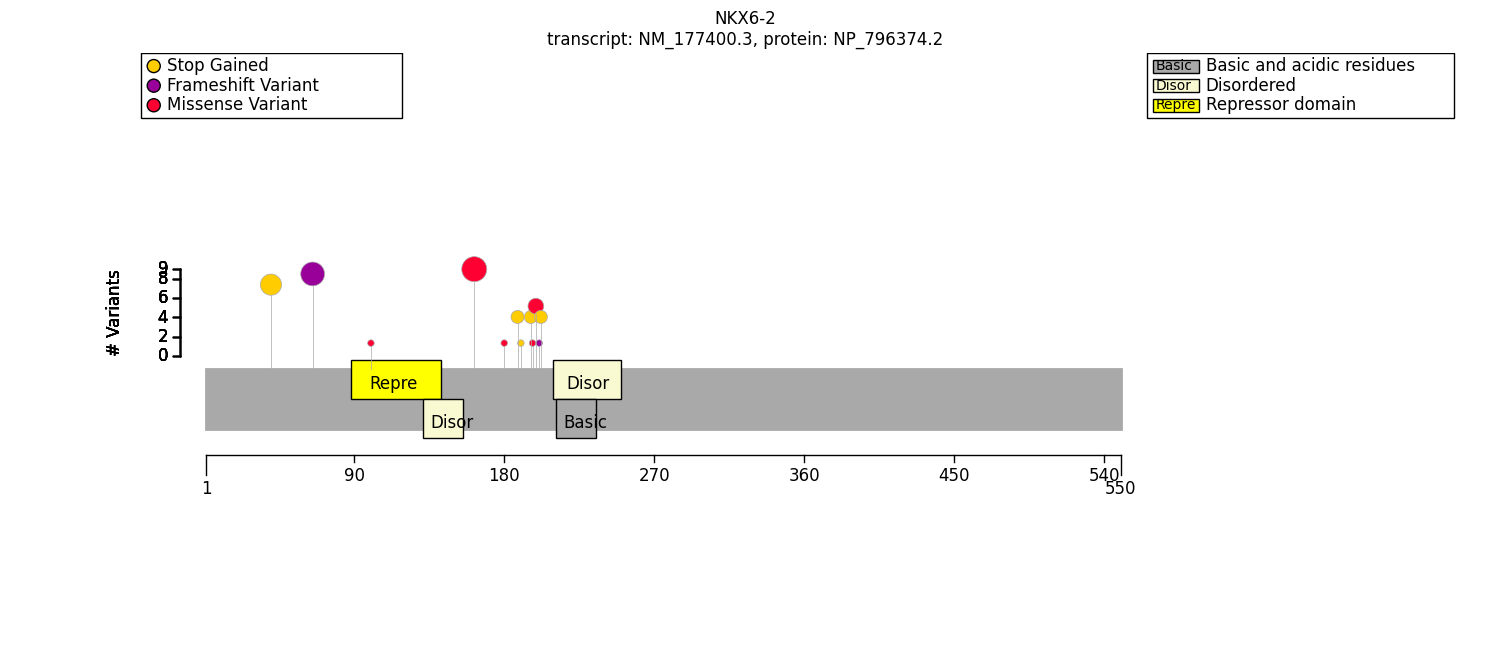

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.model import ProteinMetadata
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)

protein_meta = ProteinMetadata.from_uniprot_json(
        protein_id=mane_protein_id,
        label="NKX6-2",
        uniprot_json="Q9C056.json",
        protein_length=550,
)

nkx6_2_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
nkx6_2_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis
15 of the 33 variants are missense, with the rest being loss of function categories. We will also test the region including the Repressor region and N-terminal to that, and the most commonly observed variants.

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)

pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect
from gpsea.analysis.clf import biallelic_classifier
from gpsea.view import MtcStatsViewer

missense = variant_effect(VariantEffect.MISSENSE_VARIANT, mane_tx_id)
missense_clf = biallelic_classifier(
    a_predicate=missense,
    b_predicate=~missense,
    a_label="missense",
    b_label="other",
    partitions=((0,), (2,1))
)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(missense_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,7
HMF03,Skipping term because of a child term with the same individual counts,2
HMF08,Skipping general term,38
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,91


In [8]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group                                       missense/missense          \
                                                               Count Percent   
CNS hypomyelination [HP:0003429]                                 3/5     60%   
Loss of ambulation [HP:0002505]                                  3/6     50%   
Thin corpus callosum [HP:0033725]                                1/5     20%   
Hypometric saccades [HP:0000571]                                 4/7     57%   
Nystagmus [HP:0000639]                                          9/10     90%   
Hypotonia [HP:0001252]                                          7/11     64%   
Global developmental delay [HP:0001263]                         9/10     90%   
Motor delay [HP:0001270]                                         7/7    100%   
Neurodevelopmental delay [HP:0012758]                          10/10    100%   
Neurodevelopmental abnormality [HP:0012759]                    10/10    100%   
Ataxia [HP:0001251]                                              2/4     50%   
Spasticity [HP:0001257]                                        10/10    100%   
Upper motor neuron dysfunction [HP:0002493]                    10/10    100%   
Abnormal muscle tone [HP:0003808]                              11/11    100%   
Hyperreflexia [HP:0001347]                                       7/7    100%   
Abnormal involuntary eye movements [HP:0012547]                  9/9    100%   
Morphological central nervous system abnormalit...               3/3    100%   
Abnormal CNS myelination [HP:0011400]                            3/3    100%   

Allele group                                       other/other OR missense/other  \
                                                                           Count   
CNS hypomyelination [HP:0003429]                                           15/15   
Loss of ambulation [HP:0002505]                                            10/11   
Thin corpus callosum [HP:0033725]                                            5/9   
Hypometric saccades [HP:0000571]                                            3/11   
Nystagmus [HP:0000639]                                                     20/20   
Hypotonia [HP:0001252]                                                     12/14   
Global developmental delay [HP:0001263]                                    15/22   
Motor delay [HP:0001270]                                                   17/17   
Neurodevelopmental delay [HP:0012758]                                      17/17   
Neurodevelopmental abnormality [HP:0012759]                                17/17   
Ataxia [HP:0001251]                                                         7/11   
Spasticity [HP:0001257]                                                    22/22   
Upper motor neuron dysfunction [HP:0002493]                                22/22   
Abnormal muscle tone [HP:0003808]                                          22/22   
Hyperreflexia [HP:0001347]                                                 13/13   
Abnormal involuntary eye movements [HP:0012547]                            20/20   
Morphological central nervous system abnormalit...                         15/15   
Abnormal CNS myelination [HP:0011400]                                      15/15   

Allele group                                                                   \
                                                   Percent Corrected p values   
CNS hypomyelination [HP:0003429]                      100%           0.888655   
Loss of ambulation [HP:0002505]                        91%           0.888655   
Thin corpus callosum [HP:0033725]                      56%           0.978043   
Hypometric saccades [HP:0000571]                       27%           0.978043   
Nystagmus [HP:0000639]                                100%           0.978043   
Hypotonia [HP:0001252]                                 86%           0.978043   
Global developmental delay [HP:0001263]                68%           0

In [9]:
from gpsea.analysis.predicate import variant_key

l163v = variant_key("10_132785372_132785372_G_C") # c.487C>G; p.Leu163Val

l163v_predicate = biallelic_classifier(
        a_predicate=l163v,
        b_predicate=~l163v,
        a_label="L163V",
        b_label="other"
    , partitions={(0,), (1,2)})
l163v_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=l163v_predicate,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=l163v_result)

Allele group                                       L163V/L163V          \
                                                         Count Percent   
CNS hypomyelination [HP:0003429]                           3/5     60%   
Global developmental delay [HP:0001263]                    8/8    100%   
Loss of ambulation [HP:0002505]                            2/4     50%   
Thin corpus callosum [HP:0033725]                          1/5     20%   
Hypometric saccades [HP:0000571]                           3/5     60%   
Ataxia [HP:0001251]                                        1/3     33%   
Motor delay [HP:0001270]                                   5/5    100%   
Neurodevelopmental delay [HP:0012758]                      8/8    100%   
Neurodevelopmental abnormality [HP:0012759]                8/8    100%   
Spasticity [HP:0001257]                                    8/8    100%   
Upper motor neuron dysfunction [HP:0002493]                8/8    100%   
Abnormal muscle tone [HP:0003808]                          9/9    100%   
Hyperreflexia [HP:0001347]                                 5/5    100%   
Nystagmus [HP:0000639]                                     8/8    100%   
Abnormal involuntary eye movements [HP:0012547]            8/8    100%   
Morphological central nervous system abnormalit...         3/3    100%   
Abnormal CNS myelination [HP:0011400]                      3/3    100%   
Hypotonia [HP:0001252]                                     7/9     78%   

Allele group                                       L163V/other OR other/other  \
                                                                        Count   
CNS hypomyelination [HP:0003429]                                        15/15   
Global developmental delay [HP:0001263]                                 16/24   
Loss of ambulation [HP:0002505]                                         11/13   
Thin corpus callosum [HP:0033725]                                         5/9   
Hypometric saccades [HP:0000571]                                         4/13   
Ataxia [HP:0001251]                                                      8/12   
Motor delay [HP:0001270]                                                19/19   
Neurodevelopmental delay [HP:0012758]                                   19/19   
Neurodevelopmental abnormality [HP:0012759]                             19/19   
Spasticity [HP:0001257]                                                 24/24   
Upper motor neuron dysfunction [HP:0002493]                             24/24   
Abnormal muscle tone [HP:0003808]                                       24/24   
Hyperreflexia [HP:0001347]                                              15/15   
Nystagmus [HP:0000639]                                                  21/22   
Abnormal involuntary eye movements [HP:0012547]                         21/21   
Morphological central nervous system abnormalit...                      15/15   
Abnormal CNS myelination [HP:0011400]                                   15/15   
Hypotonia [HP:0001252]                                                  12/16   

Allele group                                                                   \
                                                   Percent Corrected p values   
CNS hypomyelination [HP:0003429]                      100%           0.733068   
Global developmental delay [HP:0001263]                67%           0.733068   
Loss of ambulation [HP:0002505]                        85%           1.000000   
Thin corpus callosum [HP:0033725]                      56%           1.000000   
Hypometric saccades [HP:0000571]                       31%           1.000000   
Ataxia [HP:0001251]                                    67%           1.000000   
Motor delay [HP:0001270]                              100%           1.000000   
Neurodevelopmental delay [HP:0012758]                 100%           1.000000   
Neurodevelopmental abnormality [HP:0012759]           100%           1.000000   
Spastic

In [10]:
from gpsea.model.genome import Region
from gpsea.analysis.predicate import protein_region

n_term = protein_region(Region(0,160), tx_id=mane_tx_id)
nterm_predicate = biallelic_classifier(
    a_predicate=n_term,
    b_predicate=~n_term,
    a_label="N term",
    b_label="other",
    partitions={(0,1), (2,)})
nterm_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=nterm_predicate,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=nterm_result)

Allele group                                       N term/N term OR N term/other  \
                                                                           Count   
Global developmental delay [HP:0001263]                                     8/15   
Scoliosis [HP:0002650]                                                       0/7   
Hypometric saccades [HP:0000571]                                            3/11   
Hypotonia [HP:0001252]                                                       5/8   
Nystagmus [HP:0000639]                                                     12/13   
CNS hypomyelination [HP:0003429]                                             8/8   
Loss of ambulation [HP:0002505]                                             9/11   
Tube feeding [HP:0033454]                                                    1/6   
Motor delay [HP:0001270]                                                   10/10   
Neurodevelopmental delay [HP:0012758]                                      10/10   
Neurodevelopmental abnormality [HP:0012759]                                10/10   
Ataxia [HP:0001251]                                                         7/11   
Spasticity [HP:0001257]                                                    15/15   
Upper motor neuron dysfunction [HP:0002493]                                15/15   
Abnormal muscle tone [HP:0003808]                                          15/15   
Hyperreflexia [HP:0001347]                                                 11/11   
Abnormal involuntary eye movements [HP:0012547]                            12/12   
Morphological central nervous system abnormalit...                           8/8   
Abnormal CNS myelination [HP:0011400]                                        8/8   
Thin corpus callosum [HP:0033725]                                            3/7   

Allele group                                               other/other  \
                                                   Percent       Count   
Global developmental delay [HP:0001263]                53%       16/17   
Scoliosis [HP:0002650]                                  0%        5/12   
Hypometric saccades [HP:0000571]                       27%         4/7   
Hypotonia [HP:0001252]                                 62%       14/17   
Nystagmus [HP:0000639]                                 92%       17/17   
CNS hypomyelination [HP:0003429]                      100%       10/12   
Loss of ambulation [HP:0002505]                        82%         4/6   
Tube feeding [HP:0033454]                              17%        4/10   
Motor delay [HP:0001270]                              100%       14/14   
Neurodevelopmental delay [HP:0012758]                 100%       17/17   
Neurodevelopmental abnormality [HP:0012759]           100%       17/17   
Ataxia [HP:0001251]                                    64%         2/4   
Spasticity [HP:0001257]                               100%       17/17   
Upper motor neuron dysfunction [HP:0002493]           100%       17/17   
Abnormal muscle tone [HP:0003808]                     100%       18/18   
Hyperreflexia [HP:0001347]                            100%         9/9   
Abnormal involuntary eye movements [HP:0012547]       100%       17/17   
Morphological central nervous system abnormalit...    100%       10/10   
Abnormal CNS myelination [HP:0011400]                 100%       10/10   
Thin corpus callosum [HP:0033725]                      43%         3/7   

Allele group                                                                   \
                                                   Percent Corrected p values   
Global developmental delay [HP:0001263]                94%           0.266469   
Scoliosis [HP:0002650]                                 42%           1.000000   
Hypometric saccades [HP:0000571]                       57%           1.000000   
Hypotonia [HP:0001252]                                 82%           1.000000   
Nystagmus [HP:0000639]              

In [11]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo, mf_result)

Sex                                                FEMALE           MALE  \
                                                    Count Percent  Count   
Tube feeding [HP:0033454]                             0/7      0%    5/9   
Hypotonia [HP:0001252]                               8/13     62%  11/12   
Scoliosis [HP:0002650]                               4/10     40%    1/9   
Nystagmus [HP:0000639]                              13/14     93%  16/16   
Loss of ambulation [HP:0002505]                       6/9     67%    7/8   
Thin corpus callosum [HP:0033725]                     4/7     57%    2/7   
Ataxia [HP:0001251]                                   5/7     71%    4/8   
Global developmental delay [HP:0001263]             10/14     71%  14/18   
Motor delay [HP:0001270]                            11/11    100%  13/13   
Neurodevelopmental delay [HP:0012758]               12/12    100%  15/15   
Neurodevelopmental abnormality [HP:0012759]         12/12    100%  15/15   
Spasticity [HP:0001257]                             14/14    100%  18/18   
Upper motor neuron dysfunction [HP:0002493]         14/14    100%  18/18   
Abnormal muscle tone [HP:0003808]                   15/15    100%  18/18   
Hyperreflexia [HP:0001347]                          11/11    100%    9/9   
Abnormal involuntary eye movements [HP:0012547]     13/13    100%  16/16   
Morphological central nervous system abnormalit...    8/8    100%  10/10   
CNS hypomyelination [HP:0003429]                      8/9     89%  10/11   
Abnormal CNS myelination [HP:0011400]                 8/8    100%  10/10   
Hypometric saccades [HP:0000571]                      3/9     33%    4/9   

Sex                                                                            \
                                                   Percent Corrected p values   
Tube feeding [HP:0033454]                              56%           0.673077   
Hypotonia [HP:0001252]                                 92%           1.000000   
Scoliosis [HP:0002650]                                 11%           1.000000   
Nystagmus [HP:0000639]                                100%           1.000000   
Loss of ambulation [HP:0002505]                        88%           1.000000   
Thin corpus callosum [HP:0033725]                      29%           1.000000   
Ataxia [HP:0001251]                                    50%           1.000000   
Global developmental delay [HP:0001263]                78%           1.000000   
Motor delay [HP:0001270]                              100%           1.000000   
Neurodevelopmental delay [HP:0012758]                 100%           1.000000   
Neurodevelopmental abnormality [HP:0012759]           100%           1.000000   
Spasticity [HP:0001257]                               100%           1.000000   
Upper motor neuron dysfunction [HP:0002493]           100%           1.000000   
Abnormal muscle tone [HP:0003808]                     100%           1.000000   
Hyperreflexia [HP:0001347]                            100%           1.000000   
Abnormal involuntary eye movements [HP:0012547]       100%           1.000000   
Morphological central nervous system abnormalit...    100%           1.000000   
CNS hypomyelination [HP:0003429]                       91%           1.000000   
Abnormal CNS myelination [HP:0011400]                 100%           1.000000   
Hypometric saccades [HP:0000571]                       44%           1.000000   

Sex                                                           
                                                    p values  
Tube feeding [HP:0033454]                           0.033654  
Hypotonia [HP:0001252]                              0.160248  
Scoliosis [HP:0002650]                              0.303406  
Nystagmus [HP:0000639]                              0.466667  
Loss of ambulation [HP:0002505]                     0.576471  
Thin corpus callosum [HP:0033725]                   0.592075  
Ataxia [HP:0001251]                     

# Summary

In [12]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary


FET_results = (
   GPAnalysisResultSummary.from_multi(
        result=missense_result,
    
    ),
    GPAnalysisResultSummary.from_multi(
        result=l163v_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=nterm_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result
    )
)


nkx6_2_caption = "No statistically significant results identified."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=FET_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=nkx6_2_caption)

In [13]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
missense/missense,other/other OR missense/other,18,0
Genotype (A),Genotype (B),Tests performed,Significant tests
L163V/L163V,L163V/other OR other/other,18,0
Genotype (A),Genotype (B),Tests performed,Significant tests
N term/N term OR N term/other,other/other,20,0
Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,20,0


In [14]:
summarizer.process_latex(report=report, protein_fig=nkx6_2_fig)

Figure saved to ../../supplement/img/NKX6-2_protein_diagram-draft.pdf
Output to ../../supplement/tex/NKX6-2_summary_draft.tex
